# Day 3 作業

## [作業目標]:
熟悉對 HSV 的操作、Histogram equalization,以及二值化的使用。

## [作業重點]:
1. 將 RGB 轉換為 HSV,分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization,並印出處理結果(處理完的圖
片和處理完的 Value)
3. 將 RGB 轉換為 Gray level,再進行單值二值化及自適應二值化



## 解題步驟

1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)
3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

## 先讀取並顯示圖片

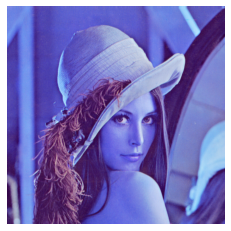

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./D00_lena.png')

# cv2 預設 color space 是 BGR，但 matplotlib，
# 顯示是以 RGB 來顯示，故需要做順序的調整
plt.imshow(img[..., [2, 1, 0]])
plt.axis('off')
plt.show()

## 1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value

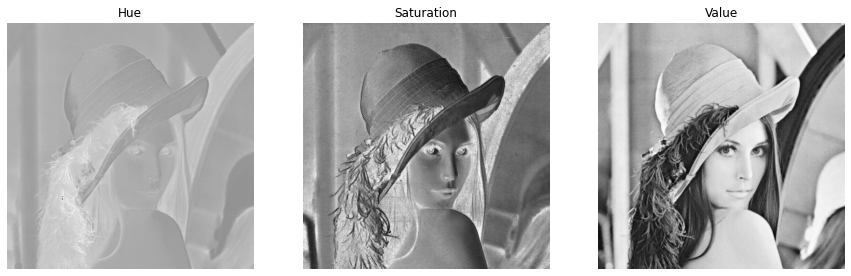

In [13]:
# 將 RGB 轉換為 HSV
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# 分別印出 Hue, Saturation, Value
title = ['Hue', 'Saturation', 'Value']
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(1, 3, i + 1, title = title[i])
    plt.imshow(img_hsv[..., i], cmap = 'gray')
    plt.axis('off')

plt.show()

## 2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)

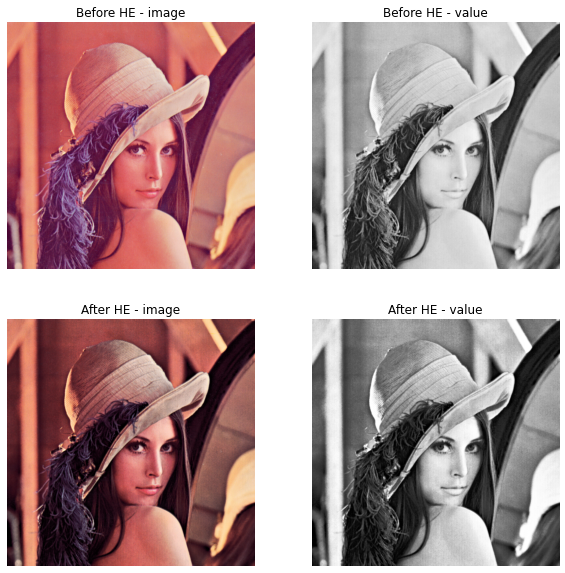

In [3]:
plt.figure(figsize = (10,10))
for i in range(2):
    # Histogram Equalization
    img_hsv_temp = img_hsv[:]
    img_hsv_temp [..., 2] = cv2.equalizeHist(img_hsv[..., 2]) if i else img_hsv[..., 2]
    img_temp = cv2.cvtColor(img_hsv_temp, cv2.COLOR_HSV2BGR)

    # 印出 HE 前後的圖片與 value
    plt.subplot(2, 2, i*2+1, title = f'{"After" if i else "Before"} HE - image')
    plt.imshow(img_temp[..., [2, 1, 0]])
    plt.axis('off')
    plt.subplot(2, 2, i*2+2, title = f'{"After" if i else "Before"} HE - value')
    plt.axis('off')
    plt.imshow(img_hsv_temp[..., 2], cmap = 'gray')
plt.show()

## 3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

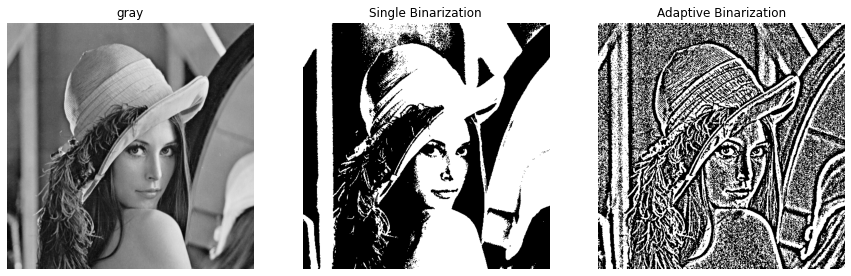

In [4]:
# 將圖片轉換為灰階圖片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Single Binarization
ret, thrsh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Adaptive Binarization
dst = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 0)

# 輸出圖片
plt.figure(figsize = (15, 15))
for i,x in enumerate({'gray' : gray,
                      'Single Binarization' : thrsh,
                      'Adaptive Binarization' : dst}.items()):
    plt.subplot(1, 3, i+1, title = x[0])
    plt.imshow(x[1], cmap = 'gray')
    plt.axis('off')
plt.show()